# Chapter 9 - Plotting & Visualization

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

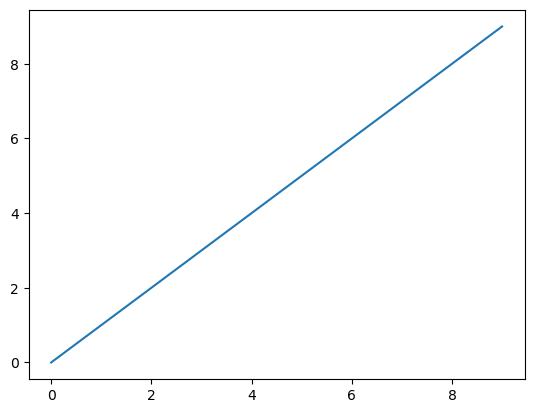

In [4]:
plt.plot(data)
plt.show()

### Figures & Subplots

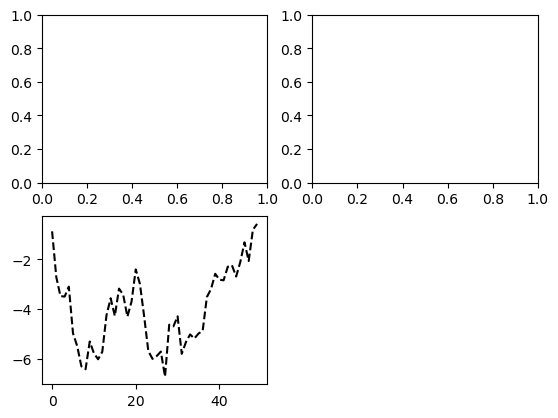

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")
plt.show()

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

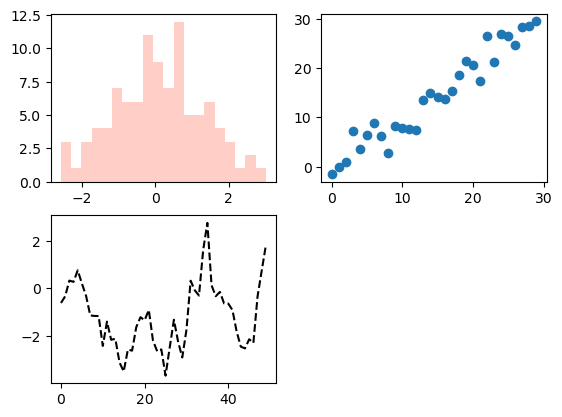

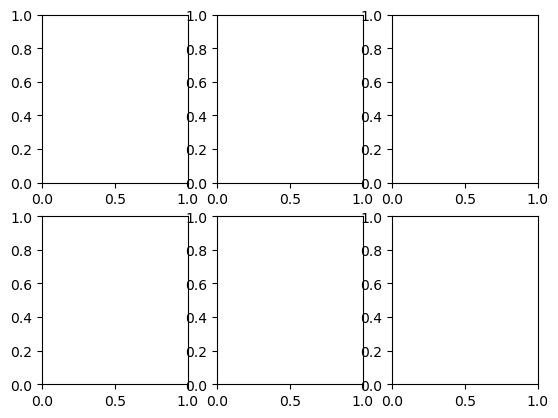

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.standard_normal(100), bins=20, color="tomato", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")
fig, axes = plt.subplots(2, 3)
axes

### Adjusting The Spacing Around Subplots

In [18]:
# subplots_adjust(left=None, botton=None, right=None, top=None, wspace=None, hspace=None)

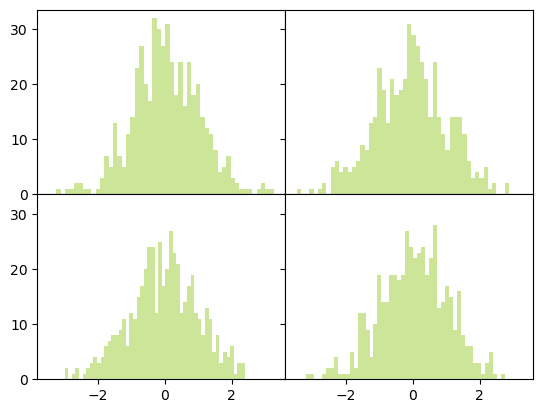

In [20]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                       color="yellowgreen", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers & Line Styles

In [22]:
# ax.plot(x, y, linestyle="--", color="green")

In [23]:
plt.plot?

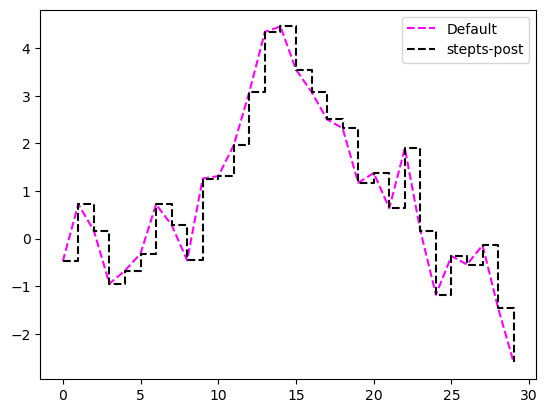

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="magenta", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
       drawstyle="steps-post", label="stepts-post");
ax.legend()
plt.show()

### Ticks, Labels & Legends

##### Setting the title, axis labels & tick labels

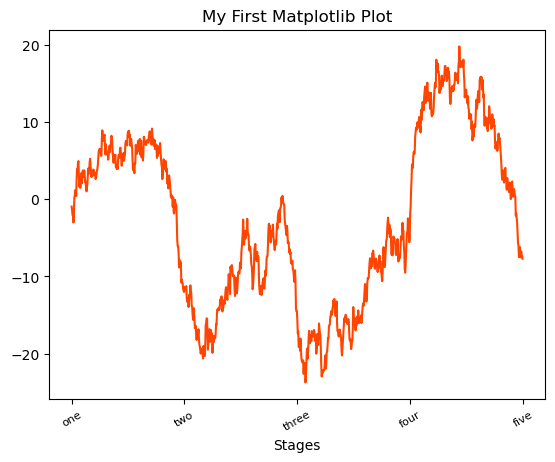

In [43]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum(), color="orangered");
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My First Matplotlib Plot")
plt.show()

### Adding Legends

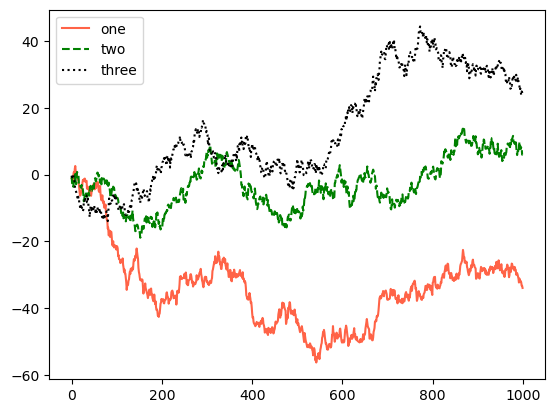

In [50]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(),color="tomato", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="green", linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="three");
ax.legend()
plt.show()

In [51]:
ax.legend?

### Annotations & Drawing on a Subplot

In [53]:
# ax.text(x, y, "Hello World!",
#        family="moonspace", fortsize=10)

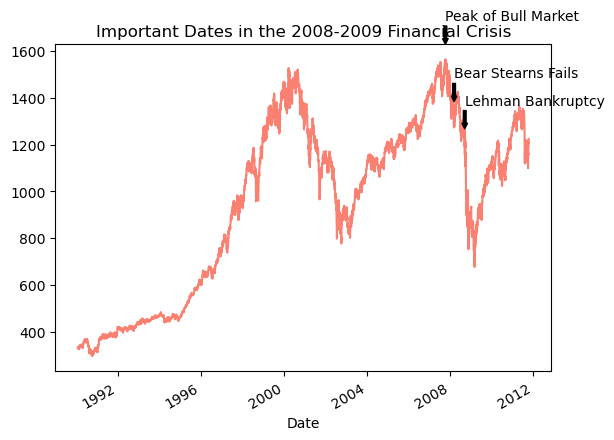

In [66]:
fig, ax = plt.subplots()
data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx= data["SPX"]
spx.plot(ax=ax, color="salmon")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of Bull Market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                              headlength=4),
               horizontalalignment="left", verticalalignment="top")
    
ax.set_title("Important Dates in the 2008-2009 Financial Crisis")
plt.show()

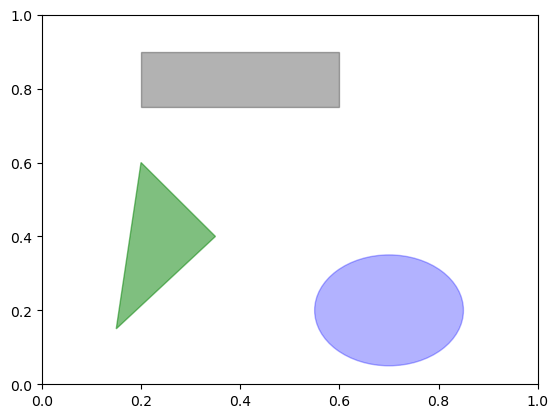

In [73]:
fig, ax = plt.subplots()
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

fig.savefig("figpath.png", dpi=400)

### Saving Plots to File

In [71]:
# fig.savefig("figpath.svg")

In [74]:
# Check previous Viz
# fig.savefig("figpath.png", dpi=400)

### Matplotlib Configuration

In [2]:
# plt.rc("figure", figsize=(10, 10))

In [3]:
# plt.rc("font", fmaily="moonspace", wight="bold", size=8)

# 9.2 Plotting with Pandas & Seaborn

### Line Plots

In [11]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))

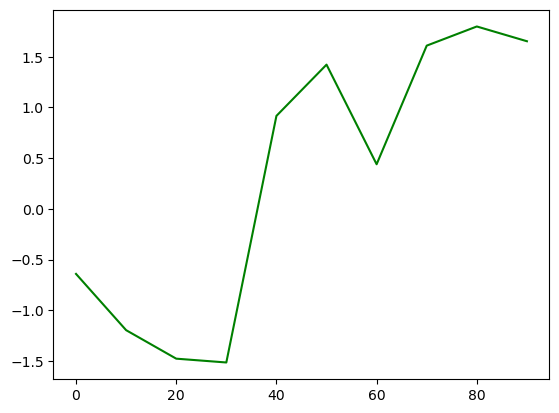

In [13]:
s.plot(color='green')
plt.show()

In [22]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                 columns=["A", "B", "C", "D"],
                 index=np.arange(0, 100, 10))
plt.style.use('grayscale')

<function matplotlib.pyplot.show(close=None, block=None)>

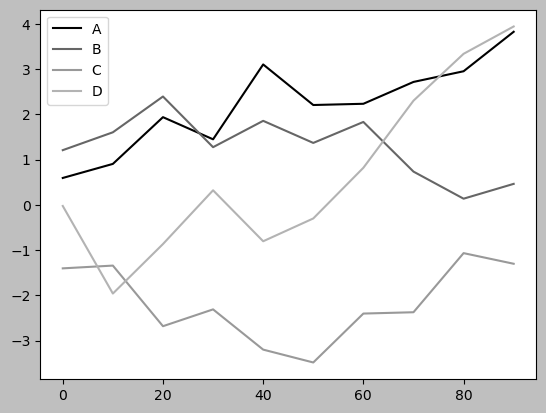

In [23]:
df.plot()
plt.show

### Bar Plots

<AxesSubplot: >

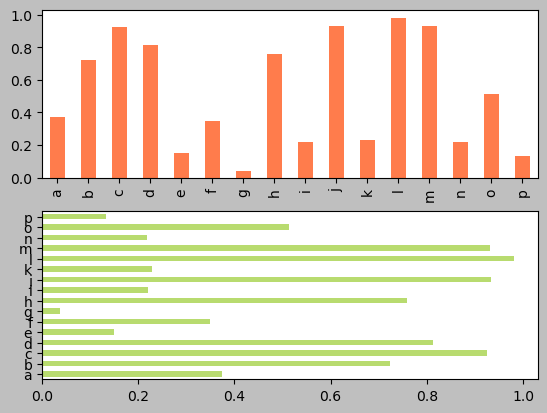

In [28]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="orangered", alpha=0.7)
data.plot.barh(ax=axes[1], color="yellowgreen", alpha=0.7)

In [29]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                 index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.121913,0.987217,0.000664,0.649426
two,0.715176,0.340775,0.996490,0.205194
three,0.259969,0.948351,0.106207,0.276934
four,0.815989,0.449290,0.222041,0.929194
five,0.952243,0.391060,0.817908,0.232184
six,0.688277,0.634659,0.931125,0.888469


<AxesSubplot: >

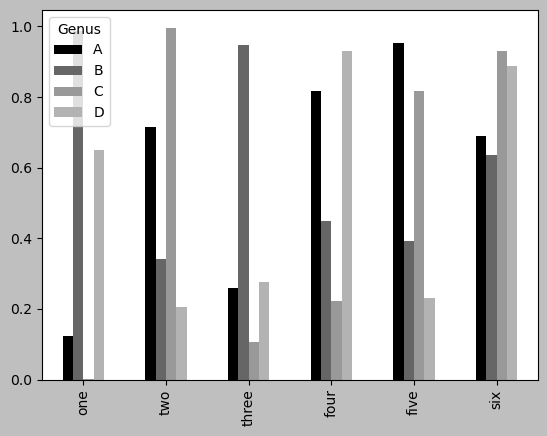

In [36]:
df.plot.bar()

<AxesSubplot: >

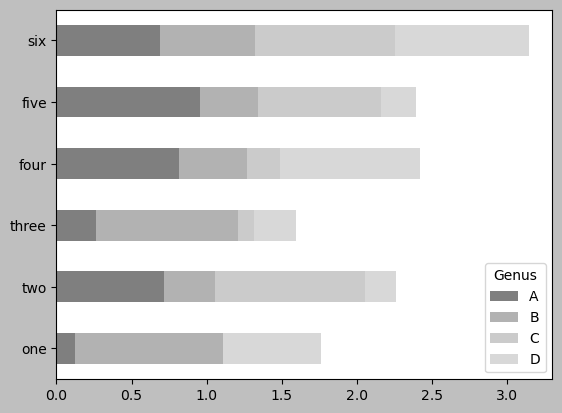

In [39]:
df.plot.barh(stacked=True, alpha=0.5)

In [41]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [42]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [44]:
party_counts = party_counts.loc[:, 2:5]

In [46]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<AxesSubplot: xlabel='day'>

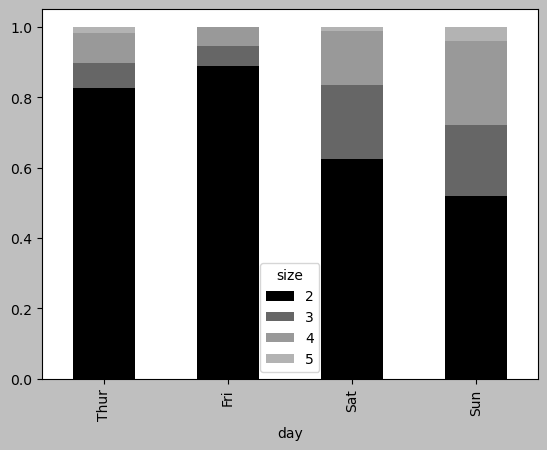

In [47]:
party_pcts.plot.bar(stacked=True)

In [52]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot: xlabel='tip_pct', ylabel='day'>

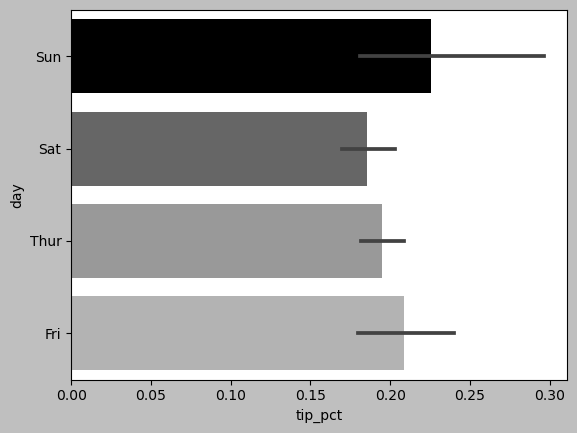

In [53]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

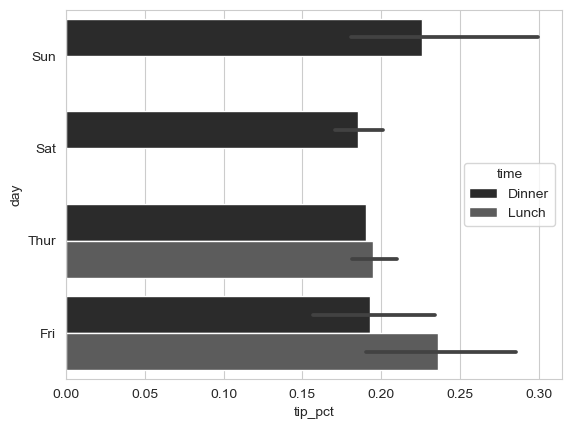

In [60]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")
plt.show()

In [56]:
# sns.set_style("whitegrid")

In [57]:
# sns.set_palette("Greys_r")

### Histograms & Density

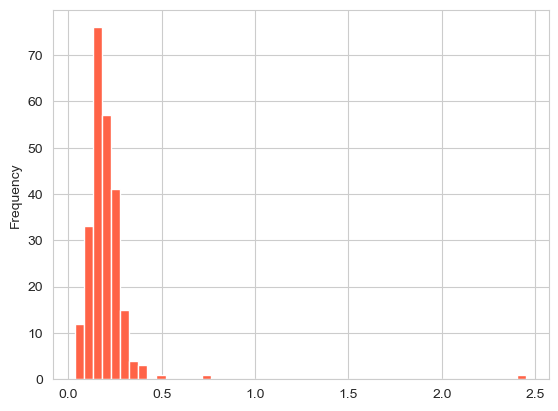

In [63]:
tips["tip_pct"].plot.hist(bins=50, color="tomato")
plt.show()

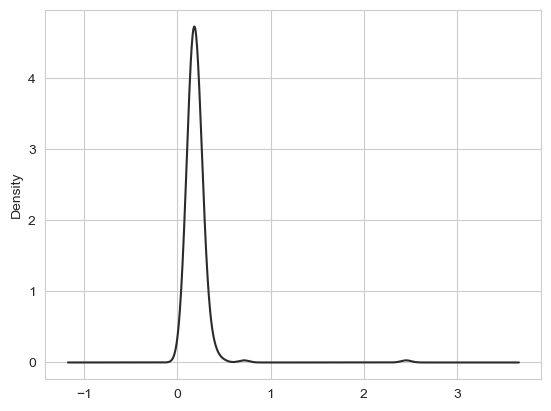

In [65]:
tips["tip_pct"].plot.density()
plt.show()

<AxesSubplot: ylabel='Count'>

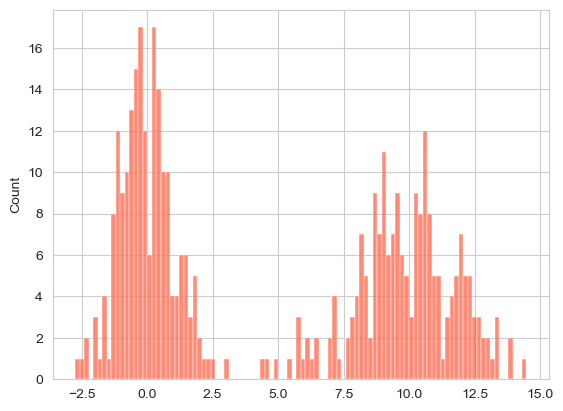

In [67]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color="tomato")

### Scatter or Point Plots

In [69]:
macro = pd.read_csv("examples/macrodata.csv")

In [71]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

In [72]:
trans_data = np.log(data).diff().dropna()

In [73]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


TypeError: 'Text' object is not callable

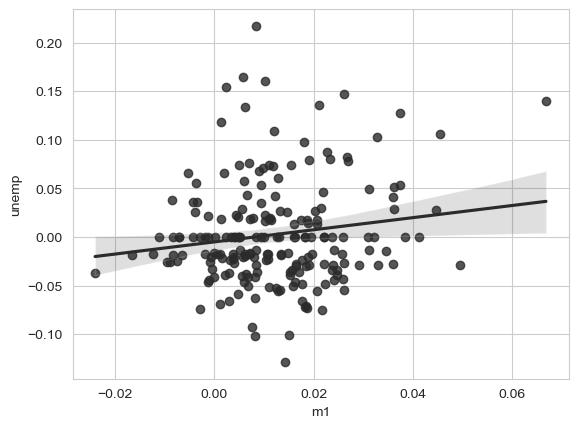

In [77]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.title("Changes in log(m1) versus log(unemp)")

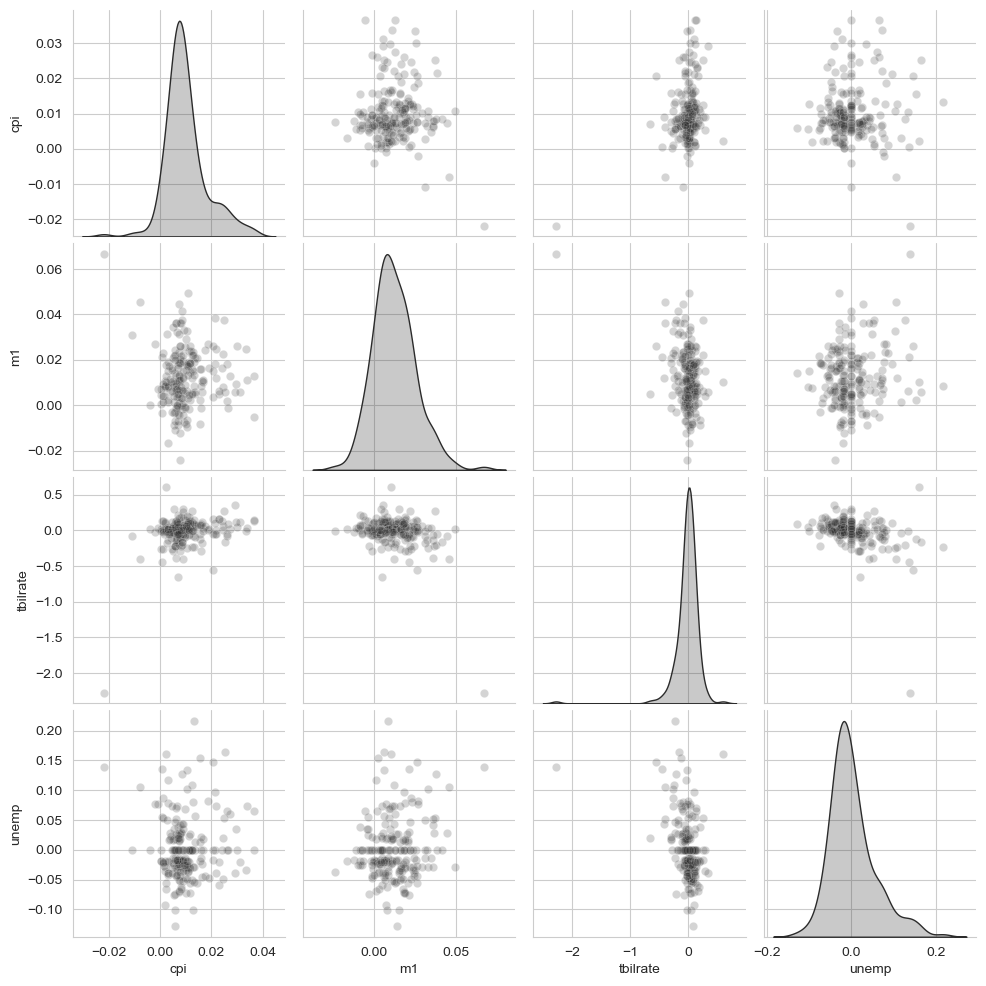

In [84]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha":0.2})
plt.show()

### Facets Grids & Categorical Data

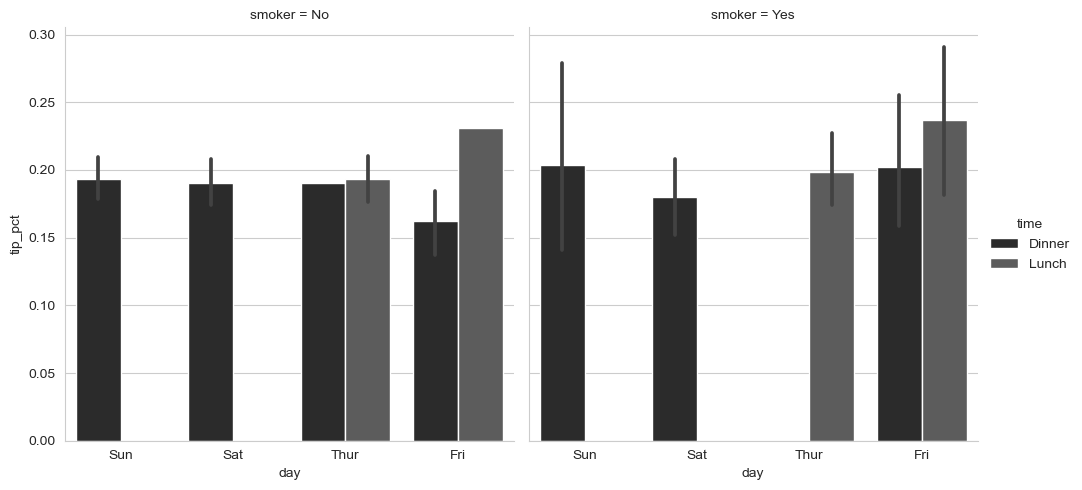

In [86]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])
plt.show()

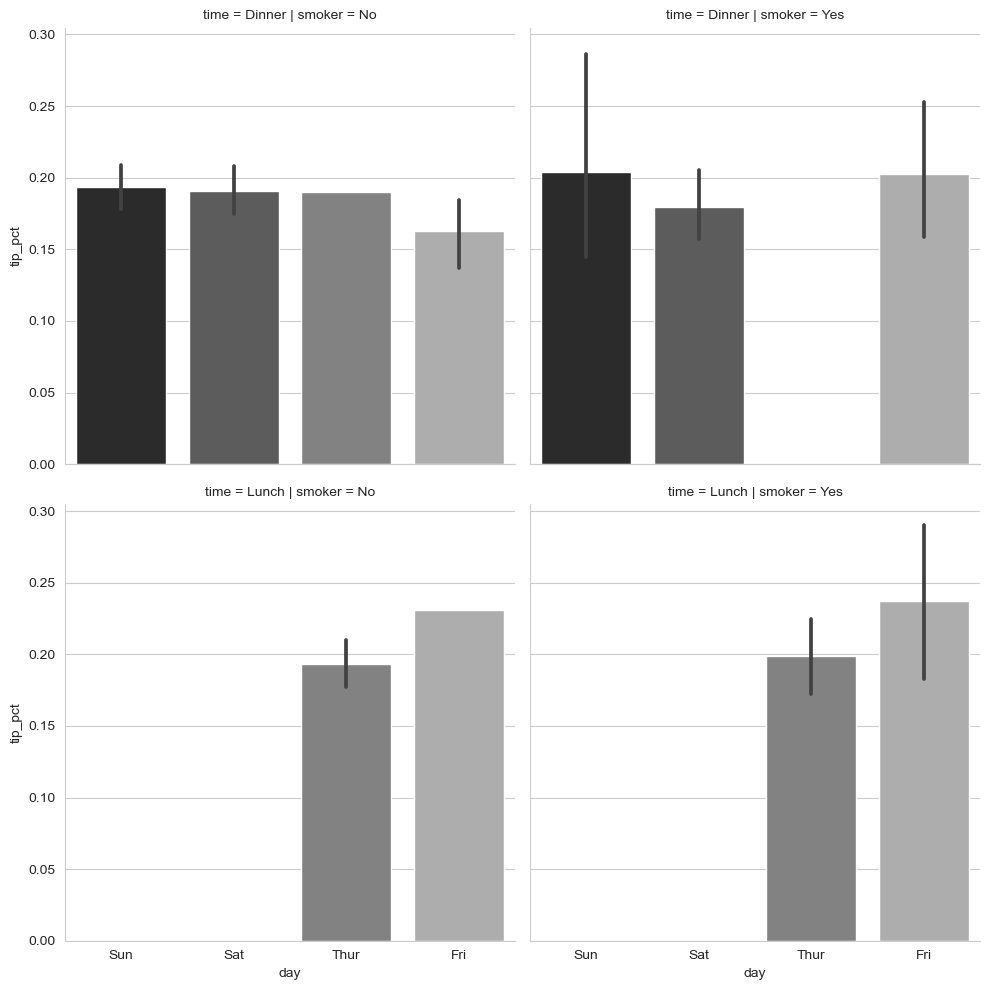

In [88]:
sns.catplot(x="day", y="tip_pct", row="time",
           col="smoker",
           kind="bar", data=tips[tips.tip_pct < 1])
plt.show()

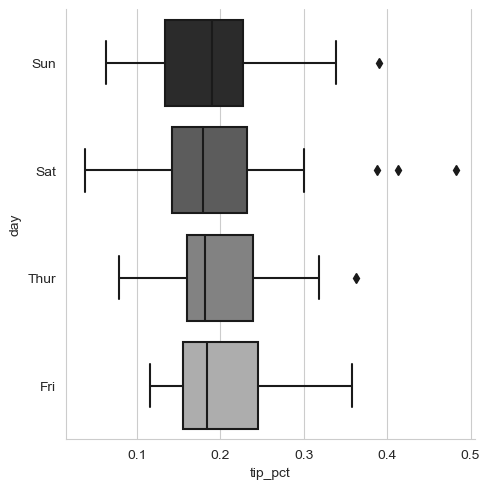

In [89]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])